In [ ]:
! pip install gurobipy

In [ ]:
import numpy as np
import gurobipy as gp
import pandas as pd

In [ ]:
df=pd.read_csv('hw2_demand.csv')
demand_values=df.values
df.head()


,X1,X2,X3,X4,X5
0,19,1358,95,65,4994
1,31,734,153,106,1711
2,45,732,198,348,205
3,1,57,64,89,278
4,180,316,277,176,46


In [ ]:
n_h_vars=demand_values.ravel().shape[0]
n_days=df.shape[0]


We will have 5 sets of printing based decision variables additionally we will have 5 sets of profits for each day
Thus in totatlity we will have 5 +5*50 decision variables that we can run our optimization on


Previosuly we have solved problem for 1 news vendor 
We can use the same desin flow with a 5 unit based slider to solve this 5 newsvendor problem

Let five newspapers be A,B,C,D and E
I propose 
"""
h1A, h1B,h1C,h1D,h1E
h2A,h2B....



h100A,h100B,h100C,h100D,h100E
qa,qb,qc,qd,qe
"""



The number of days will change from 25 to 50 
Also 5 consecutive variables will be updated each time


# Formulation of objective

In [ ]:
obj = np.zeros(n_h_vars+5)
obj[:-5] = 1.0/n_days

# Lower Bounds

In [ ]:
lb = np.zeros(n_h_vars+5)
lb[:-5] = -np.inf 

# Constraint Design Matrix

We will have 2 bounding constraint for each of the 5 profit values and these cosntraints will be applied for every 50 days

Therefore we will have 2*5*50=500 constraints applied across all the 50*5 +5 decision variables 

In [ ]:
A=np.zeros((2*n_h_vars,n_h_vars+5))
# A.shape

cp_arr=[0.50, 0.50, 0.25, 0.75, 0.25]
sp_arr=[1.25,1.20,0.50,1.50,0.60]

rhs = np.zeros(2*n_h_vars)
direction = np.array(['<']*(2*n_h_vars))


hi<s_P*demand_i-c_p*I_will_print_i if I_will_print_i>demand_i
hi<s_p*I_will_print_i -c_P*I_will_print_i if I_will_print_i<=demand_i

1st Constraint
hi + c_P*I_will_print_i <=s_P*demand_i

2nd Constraint
hi +  c_P*I_will_print_i -  s_P*I_will_print_i <=0


# Thought process


In [ ]:
# But here we will have to update 5 constraints at a times as the design of the matrix is so that 5 d_vars associated with profit are assembeled together

r=0#Lets just update the first five*2 =10 constraints out of 500 ones
#This will only require 1st day demand and repsective cost_prices and selling prices

# A[2*r,[0,r+1]] = [cost,1] # location 1 is q, location r+1 is this h
# rhs[2*r] = price*demand_df.demand[r]

# A[2*r+1,[0,r+1]] = [cost-price,1]
# rhs[2*r+1] = 0

In [ ]:
A=np.zeros((2*n_h_vars,n_h_vars+5))

for r in range(50):
  odd=2*r+1
  even=2*r
  # print(even,odd,sep='-->',end='\n')
  day_even=even*5

  for first_i in range(5):
    #1st series of constraints
    A[day_even+first_i,[5*r+first_i,250+first_i]] = [1,cp_arr[first_i]] 
    rhs[day_even+first_i] = sp_arr[first_i]*demand_values[r,first_i]
  day_odd=odd*5
  for second_i in range(5):
    #1st series of constraints
    A[day_odd+second_i,[5*r+second_i,250+second_i]] = [1,cp_arr[second_i]-sp_arr[second_i]]
    rhs[day_odd+second_i] = 0


In [ ]:
row_indices=np.arange(20)
col_idx=np.array([250+i for i in range(5)])#+list(range(10)))
A[row_indices.reshape(-1,1),col_idx]

array([[ 0.5 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.75,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.25],
       [-0.75,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.7 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.75,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.35],
       [ 0.5 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.75,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.25],
       [-0.75,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.7 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.75,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.35]])

In [ ]:
A

array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.25,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., -0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , -0.75,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  , -0.35]])

In [ ]:
spMod = gp.Model()
spMod_x = spMod.addMVar(len(obj),lb=lb) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
spMod_con = spMod.addMConstrs(A, spMod_x, direction, rhs) # NAME THE CONSTRAINTS!!! so we can get information about them later!
spMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

spMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
spMod.optimize()


In [ ]:
spMod_x.x[-5:]

array([ 76., 462., 205., 123., 422.])

In [ ]:
spMod.objval

336.9889999999998

In [ ]:
q=spMod_x.x[-5:]
optimal_demand_each_day=np.minimum(demand_values,q)

np.mean(np.sum(optimal_demand_each_day*sp_arr-cp_arr*q,axis=1))

336.9889999999999

In [ ]:
numsold = np.minimum(spMod_x.x[0],demand_df.demand) # on each day, how many did we actually sell
np.mean(price*numsold - cost*spMod_x.x[0]) 

ANS 4)

In [ ]:
import numpy as np
import numpy.random as npr



In [ ]:
def calculate_profit():
  process_1=npr.normal(loc=10,scale=3,size=100)
  process_2=npr.normal(loc=5,scale=2,size=200)

  cost_price=100*10+200*5

  total_chips=np.concatenate([process_1,process_2])

  S_P=np.where(total_chips>=7,15,8)
  selling_price=np.sum(S_P)

  profit=selling_price-cost_price
  return profit
p_lt=[]
for _ in range(10000):
  p_instance=calculate_profit()
  p_lt.append(p_instance)



(array([  3.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,  13.,   0.,  11.,
          0.,   0.,  28.,   0.,  46.,   0.,  46.,   0.,  88.,   0.,  89.,
          0., 160.,   0.,   0., 204.,   0., 229.,   0., 323.,   0., 344.,
          0., 397.,   0., 475.,   0.,   0., 518.,   0., 587.,   0., 609.,
          0., 618.,   0., 671.,   0.,   0., 605.,   0., 616.,   0., 558.,
          0., 494.,   0., 396.,   0., 404.,   0.,   0., 332.,   0., 272.,
          0., 226.,   0., 185.,   0., 132.,   0.,  90.,   0.,   0.,  62.,
          0.,  54.,   0.,  40.,   0.,  21.,   0.,  18.,   0.,   9.,   0.,
          0.,  10.,   0.,   6.,   0.,   3.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([1058.  , 1061.22, 1064.44, 1067.66, 1070.88, 1074.1 , 1077.32,
        1080.54, 1083.76, 1086.98, 1090.2 , 1093.42, 1096.64, 1099.86,
        1103.08, 1106.3 , 1109.52, 1112.74, 1115.96, 1119.18, 1122.4 ,
        1125.62, 1128.84, 1132.06, 1135.28, 1138.5 , 1141.72, 1144.94,
        1148.16, 1151.38, 1154.6 ,

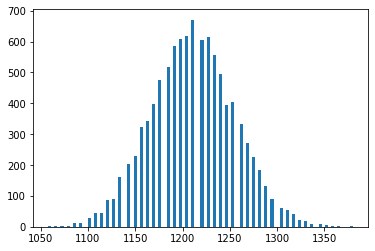

In [ ]:
import matplotlib.pyplot as plt
plt.hist(p_lt,bins=100)

In [ ]:
np.std(p_lt),np.mean(p_lt)

(44.03916506202178, 1210.8492)

# ROUGH WORK

In [ ]:
temp=np.arange(500)
for r in range(n_days):
  even=2*r
  odd=2*r+1
  print('even',temp[5*even:5*even+5])
  print('odd_',odd,temp[5*odd:5*odd+5])
  if r==2:
    break

even [0 1 2 3 4]
odd_ 1 [5 6 7 8 9]
even [10 11 12 13 14]
odd_ 3 [15 16 17 18 19]
even [20 21 22 23 24]
odd_ 5 [25 26 27 28 29]


In [ ]:
  # hi_to_deal_with=5*r

  # first_five=A[5*even:5*even+5,:]
  # second_five=A[5*odd:5*odd+5,:]
  break


  # print('even',temp[5*even:5*even+5])
  # print('odd_',odd,temp[5*odd:5*odd+5])
  # if r==2:
  #   break

SyntaxError: ignored

In [ ]:
# temp[np.index()]